# Executive Summary

# Introduciton

# Exploratory data analysis 

In [1]:
#pietro
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

#jenna
import statsmodels.formula.api as smf

#edo
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
file_path = 'imdb_movies.csv'
# Try loading the CSV file with a different encoding
imdb_movies = pd.read_csv(file_path)

# Display the first few rows of the dataframe
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [3]:
imdb_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [4]:
imdb_movies["date_x"]= pd.to_datetime(imdb_movies["date_x"])
imdb_movies.dtypes

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
dtype: object

In [5]:
imdb_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [6]:
imdb_movies.dropna(inplace=True)
imdb_movies.isna().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [7]:
#check for duplicates 
print(imdb_movies.duplicated().sum())

0


no duplicates

In [8]:
imdb_movies.rename(columns={'date_x': 'release_date',
                            'budget_x': 'budget'},
                            inplace=True)

In [9]:
imdb_movies['profitable'] = (imdb_movies['revenue'] > imdb_movies['budget']).apply(lambda x: int(x))
imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1


In [10]:
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,10052,10052.00000,1.005200e+04,1.005200e+04,10052.000000
mean,2008-06-07 16:17:25.762037504,63.82700,6.412528e+07,2.512049e+08,0.802129
min,1903-05-15 00:00:00,0.00000,1.000000e+00,0.000000e+00,0.000000
25%,2002-01-08 06:00:00,59.00000,1.439763e+07,2.768781e+07,1.000000
50%,2013-04-10 00:00:00,65.00000,5.000000e+07,1.493288e+08,1.000000
75%,2019-09-26 00:00:00,71.00000,1.040000e+08,4.161578e+08,1.000000
max,2023-12-31 00:00:00,100.00000,4.600000e+08,2.923706e+09,1.000000
std,NaN,12.78271,5.665852e+07,2.765495e+08,0.398414


looking the minimum values of our variables:
- score = 0 has no significance for our analysis, 
- budget < 1000 we will assume that is a problem of data qulity, therefore we drop these values
- revenue < 1000 we make the same assumption as for budget

In [11]:
#printing the count of values that are below a certain threshold
print(imdb_movies[imdb_movies['score'] == 0].count())
print(imdb_movies[imdb_movies['revenue'] < 1000].count())
print(imdb_movies[imdb_movies['budget'] < 1000].count())


names           163
release_date    163
score           163
genre           163
overview        163
crew            163
orig_title      163
status          163
orig_lang       163
budget          163
revenue         163
country         163
profitable      163
dtype: int64
names           85
release_date    85
score           85
genre           85
overview        85
crew            85
orig_title      85
status          85
orig_lang       85
budget          85
revenue         85
country         85
profitable      85
dtype: int64
names           19
release_date    19
score           19
genre           19
overview        19
crew            19
orig_title      19
status          19
orig_lang       19
budget          19
revenue         19
country         19
profitable      19
dtype: int64


In [12]:
imdb_movies = imdb_movies[imdb_movies.score != 0]
imdb_movies = imdb_movies[imdb_movies.revenue >= 1000]
imdb_movies = imdb_movies[imdb_movies.budget >= 1000]
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,9793,9793.000000,9.793000e+03,9.793000e+03,9793.000000
mean,2008-03-16 13:10:56.918206976,64.889717,6.243951e+07,2.551389e+08,0.817421
min,1903-05-15 00:00:00,10.000000,2.000000e+03,1.242000e+03,0.000000
25%,2001-10-19 00:00:00,60.000000,1.450000e+07,2.892019e+07,1.000000
50%,2012-12-06 00:00:00,66.000000,5.000000e+07,1.470804e+08,1.000000
75%,2019-06-28 00:00:00,72.000000,1.020000e+08,4.257325e+08,1.000000
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09,1.000000
std,NaN,9.884499,5.421382e+07,2.787525e+08,0.386341


we dropped roughly 300 rows out of the original 10,000

Text(0.5, 1.0, 'Number of movies produced by the top 10 countries')

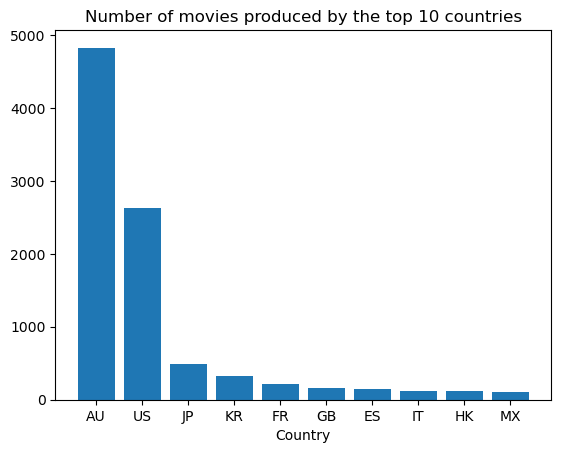

In [13]:
country = imdb_movies['country'].value_counts().head(10)
plt.bar(x=country.index, height=country)
plt.xlabel('Country')
plt.title('Number of movies produced by the top 10 countries')

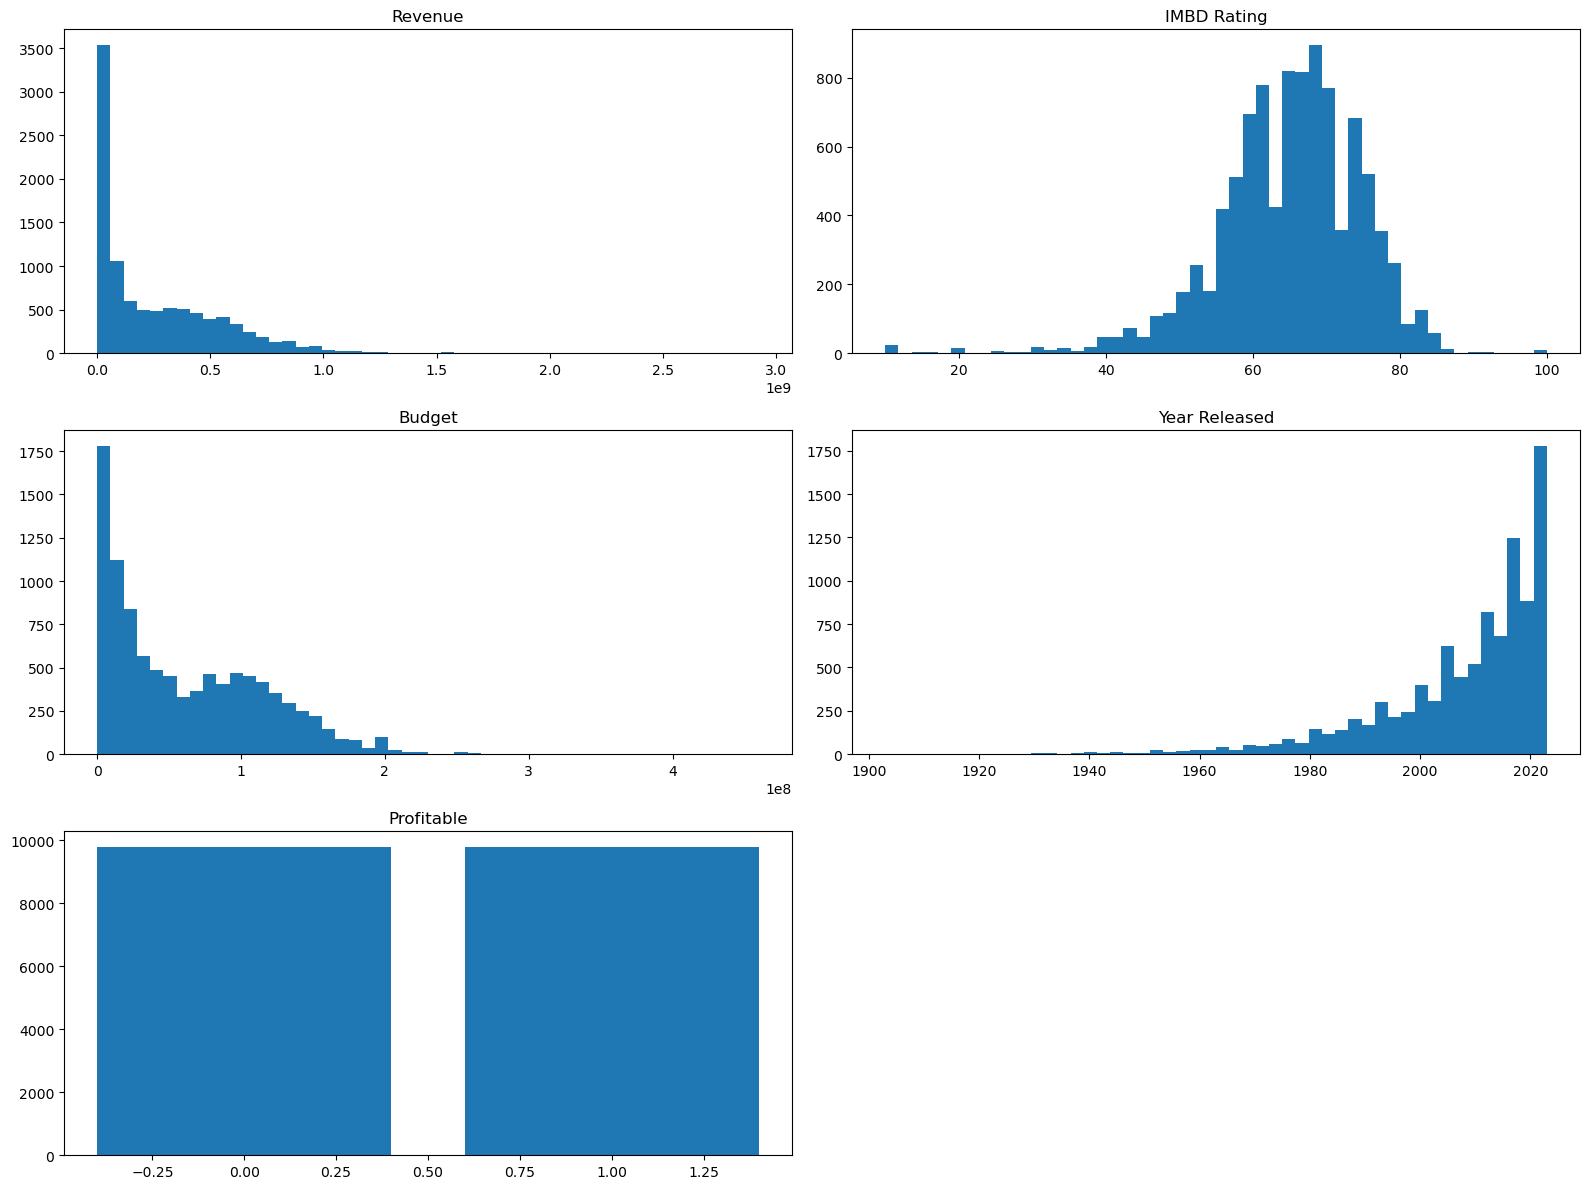

In [14]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(16, 12))
his1= imdb_movies['score']
his2= imdb_movies['budget']
his3= imdb_movies['revenue']
his4= imdb_movies['release_date'].dt.year


axes[0,0].hist(his3, bins=50)
axes[0,0].set_title('Revenue')
axes[0,1].hist(his1, bins=50)
axes[0,1].set_title('IMBD Rating')
axes[1,0].hist(his2, bins=50)
axes[1,0].set_title('Budget')
axes[1,1].hist(his4, bins=50)
axes[1,1].set_title('Year Released')
axes[2,0].bar(imdb_movies['profitable'], imdb_movies['profitable'].count())
axes[2,0].set_title('Profitable')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

## Variable analysis

only budget and score (+profitability?)

### Budget

In [15]:
imdb_movies['budget'].describe()

count    9.793000e+03
mean     6.243951e+07
std      5.421382e+07
min      2.000000e+03
25%      1.450000e+07
50%      5.000000e+07
75%      1.020000e+08
max      4.600000e+08
Name: budget, dtype: float64

In [16]:
imdb_movies['budget'].mode()


0    20000000.0
Name: budget, dtype: float64

<Axes: ylabel='budget'>

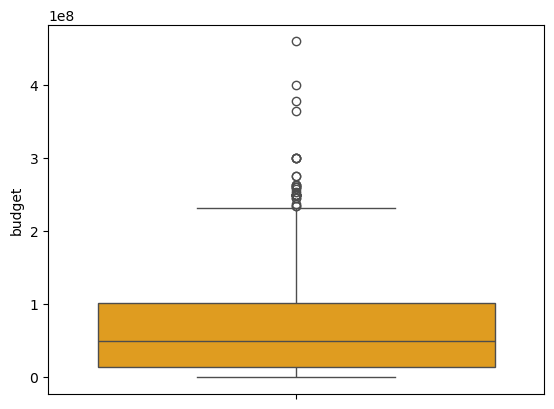

In [17]:
sns.boxplot(y=imdb_movies['budget'], color='orange')


<Axes: xlabel='budget', ylabel='Density'>

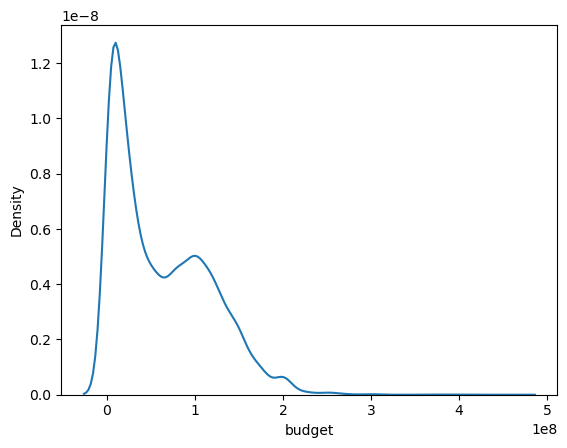

In [18]:
sns.kdeplot(imdb_movies['budget'])

In [19]:
# skewness

from scipy.stats import skew 
from scipy.stats import kurtosis 

print('skewness:', str(skew(imdb_movies['budget'], axis=0, bias=True)))
print('kurtosis:', str(kurtosis(imdb_movies['budget'], axis=0, bias=True)))

skewness: 0.831392632835075
kurtosis: 0.3804951052592074


relatively low values, so no trasformation needed

Copy for score 

### genre

In [20]:

imdb_genres = imdb_movies[['names', 'genre', 'score']]
imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')
imdb_genres = imdb_genres.explode('genre').reset_index(drop=True)
imdb_genres

/var/folders/57/8yr9qn3s45sc5vk_srfp2yv80000gn/T/ipykernel_9547/1457673940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')


,names,genre,score
0,Creed III,Drama,73.0
1,Creed III,Action,73.0
2,Avatar: The Way of Water,Science Fiction,78.0
3,Avatar: The Way of Water,Adventure,78.0
4,Avatar: The Way of Water,Action,78.0
...,...,...,...
25683,Darkman II: The Return of Durant,Thriller,55.0
25684,Darkman II: The Return of Durant,Horror,55.0
25685,The Swan Princess: A Royal Wedding,Animation,70.0
25686,The Swan Princess: A Royal Wedding,Family,70.0


In [21]:
imdb_genres.groupby('genre')['score'].agg(['max', 'min', 'mean'])

,max,min,mean
genre,,,
Action,85.0,23.0,64.489758
Adventure,85.0,15.0,65.874194
Animation,86.0,30.0,69.504530
Comedy,100.0,15.0,64.640180
Crime,90.0,25.0,65.827586
Documentary,93.0,20.0,68.930851
Drama,100.0,10.0,67.066307
Family,85.0,30.0,66.587509
Fantasy,86.0,15.0,66.395849


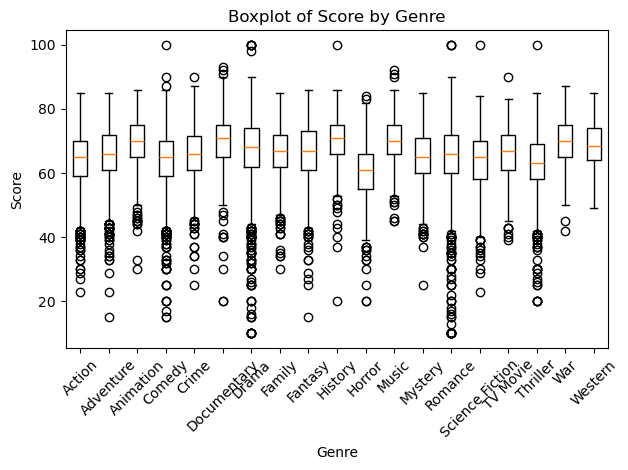

In [22]:

#boxplot 

#data preparation for boxplot
grouped_genres = imdb_genres.groupby('genre')['score'].apply(list) 
genres_list = grouped_genres.index.tolist()
genres_data_to_plot = [grouped_genres[genre] for genre in genres_list]

#boxplot preparation
fig, ax = plt.subplots()
ax.boxplot(genres_data_to_plot, labels=genres_list)
ax.set_xlabel('Genre')
ax.set_ylabel('Score')
ax.set_title('Boxplot of Score by Genre')
plt.xticks(rotation = 45)
plt.tight_layout()


<Axes: xlabel='genre'>

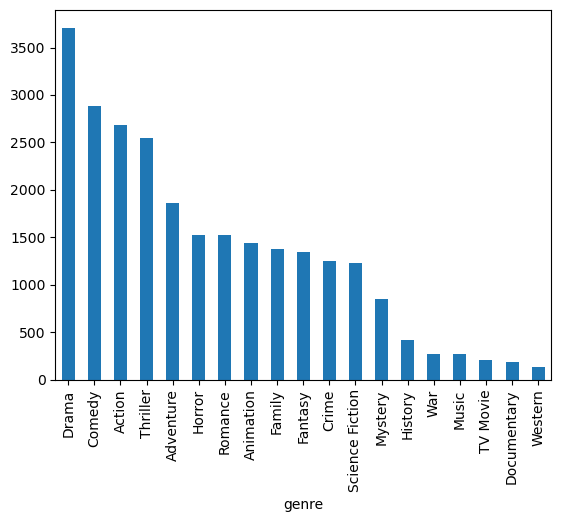

In [23]:
genre_counts = imdb_genres['genre'].value_counts()
genre_counts.plot(kind = 'bar')

## Correlations Analysis

### Score and Budget

<Axes: xlabel='budget', ylabel='score'>

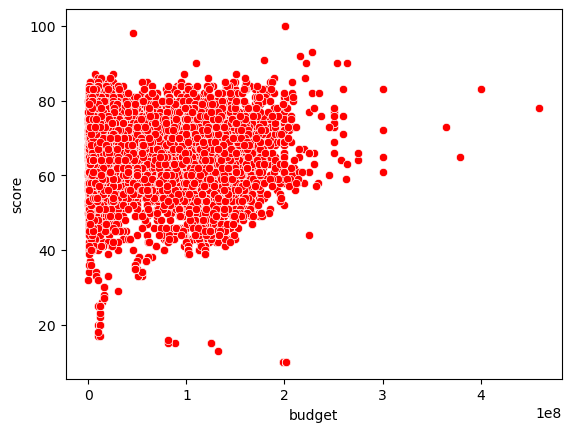

In [24]:
sns.scatterplot(y=imdb_movies['score'], x=imdb_movies['budget'], color='red')

In [25]:
imdb_movies[['budget', 'score']].cov()

,budget,score
budget,2.939138e+15,-2.420404e+07
score,-2.420404e+07,9.770332e+01


In [26]:
imdb_movies[['score', 'budget']].corr(method='pearson')

,score,budget
score,1.000000,-0.045167
budget,-0.045167,1.000000


In [27]:
imdb_movies[['score', 'budget']].corr(method='spearman')

,score,budget
score,1.000000,-0.053489
budget,-0.053489,1.000000


it seems we have a low correlation between the two variables

### Profitability and Score

In [28]:
stats.pointbiserialr(imdb_movies['profitable'], imdb_movies['score'])

SignificanceResult(statistic=0.081666832246227, pvalue=5.76386472215221e-16)

<Axes: xlabel='score', ylabel='profitable'>

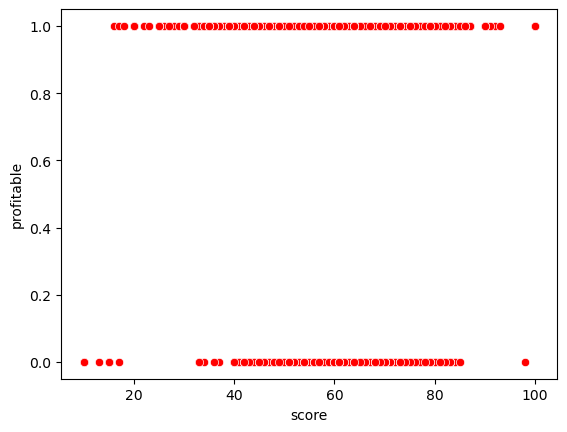

In [29]:
sns.scatterplot(y=imdb_movies['profitable'], x=imdb_movies['score'], color='red')

<Axes: xlabel='score', ylabel='Count'>

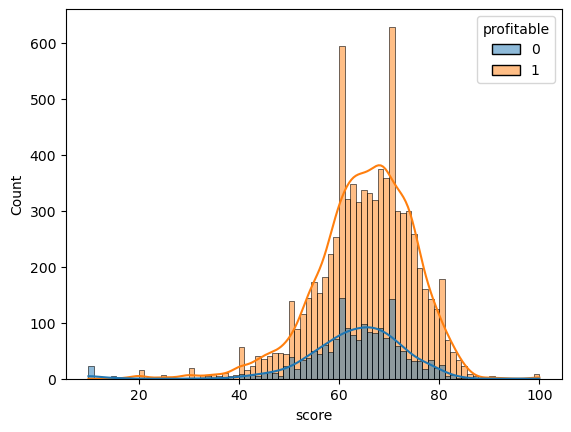

In [30]:
# histogram and density plots
sns.histplot(data=imdb_movies, x=imdb_movies['score'], hue=imdb_movies['profitable'], kde=True)

relatively weak positive correlation

generally, higher rated movies tend to break even more often

### Profitability and budget

# Method 1

In [31]:

# Fit the linear regression model
model = smf.ols(formula='score ~ budget', data=imdb_movies)
results = model.fit()

# Display the regression results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.02
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           7.77e-06
Time:                        19:13:30   Log-Likelihood:                -36321.
No. Observations:                9793   AIC:                         7.265e+04
Df Residuals:                    9791   BIC:                         7.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4039      0.152    429.701      0.000      65.106      65.702
budget     -8.235e-09   1.84e-09     -4.474      0.000   -1.18e-08   -4.63e-09
==============================================================================
Omnibus:                     1924.448   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6131.715
Skew:                          -1.000   Prob(JB):                         0.00
Kurtosis:                       6.321   Cond. No.                     1.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared: weak linear relationship between budget and score --> 5.5% variance of the score is explainable through budget

- Adjusted R-squared: stays the same, because of just one independed variables (not relevant)

- F-statistic value > Prob (F-statistics): Model has explanatory power

- coef intercept: score is 67.1206 when budget is minimal (= 0)

- coef budget_x: if budget is raising 1 Dollar, the score is lowering 0.0000005585 points (budget is raising 1.000.000$, score is lowering 0.5585 points)

In [32]:
# making predictions
pred_insample = results.predict() # or results.fittedvalues

# out of sample prediction
pred_outofsample = results.predict(imdb_movies)


# add predictions to the data frame
imdb_movies['predictions'] = results.predict()
imdb_movies['residuals'] = results.resid # computing residuals (i.e., actual - predicted values)

imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable,predictions,residuals
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1,64.786280,8.213720
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1,61.615774,16.384226
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1,64.580403,11.419597
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1,65.302620,4.697380
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1,64.769810,-3.769810


In [33]:
print(imdb_movies["budget"].dtype)

float64


Text(0.5, 1.0, 'Actual vs. Predicted')

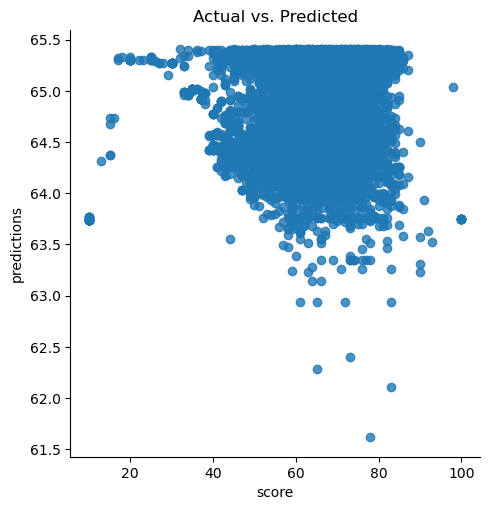

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
sns.lmplot(x = "score", y = "predictions", data = imdb_movies, fit_reg = False)        
plt.title("Actual vs. Predicted")

interpretation

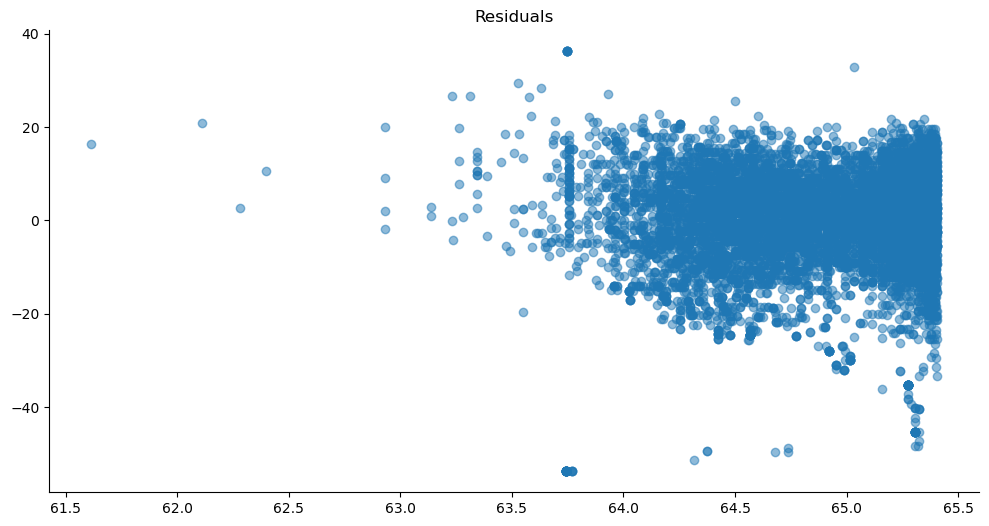

In [35]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x = imdb_movies.predictions, y = imdb_movies.residuals, alpha = 0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

Interpretation:

In [36]:
# Fit the linear regression model
model = smf.ols(formula= 'score ~ budget', data = imdb_movies) # using heteroscedasticity robust standard errors
results = model.fit(cov_type = "HC3")

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.61
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           0.000385
Time:                        19:13:40   Log-Likelihood:                -36321.
No. Observations:                9793   AIC:                         7.265e+04
Df Residuals:                    9791   BIC:                         7.266e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4039      0.160    407.534      0.0

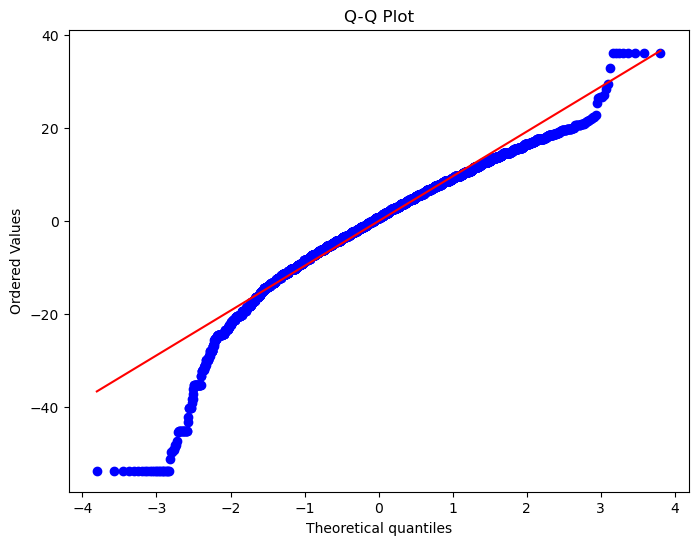

In [37]:
import scipy.stats as stats

# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(imdb_movies['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [38]:
# INSTRUCTION: Compute the VIF for all variables in the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

   VIF Factor   features
0     2.32661  Intercept
1     1.00000     budget


Interpretation:

In [39]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(imdb_movies['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 1.9426636988347077


Interpretation:

# Method 2
does imdb score influence if a movie is profitable or not?

In [ ]:
logit_model = smf.logit('profitable ~ score + budget', data= imdb_movies)
results = logit_model.fit()
print(results.summary())

In [41]:

imdb_movies.reset_index()
# clearing genre to create dummy_variables

# Replace NaN or None values with empty strings
imdb_movies['genre'] = imdb_movies['genre'].fillna('')

# Remove leading/trailing whitespaces
imdb_movies['genre'] = imdb_movies['genre'].str.strip()

# Replace multiple spaces with a single space
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r'\s+', ' ', regex=True)

# Remove spaces around commas
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r',\s*', ',', regex=True)

#replacing spaces with underscores
imdb_movies['genre'] = imdb_movies['genre'].str.replace(' ', '_')

# Split the 'genre' strings into lists
imdb_movies['genre'] = imdb_movies['genre'].str.split(',')

# Strip whitespace from each genre in the list
imdb_movies['genre'] = imdb_movies['genre'].apply(lambda genres: [genre.strip() for genre in genres if genre])



In [ ]:
#creating dummy_variables 

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(imdb_movies['genre']), columns=mlb.classes_, index=imdb_movies.index)
genre_dummies

In [ ]:
#concatenate with imdb_movies dataframe

imdb_movies = pd.concat([imdb_movies, genre_dummies], axis=1)
imdb_movies

In [ ]:
genre_dummies.columns[1:]

In [ ]:
# iteractively ccreating the formula string to use for the regression model
regression_formula_string = 'budget ~'
regression_formula_string = regression_formula_string + f" {genre_dummies.columns[0]}"
for genre in genre_dummies.columns[2:]:
    regression_formula_string += f" + {genre}"

print(f"reference Category: {genre_dummies.columns[1]}")
regression_formula_string

In [ ]:
logit_model = smf.logit('profitable ~ score + budget + Action + Animation + Comedy + Crime + Documentary + Drama + Family + Fantasy + History + Horror + Music + Mystery + Romance + Science_Fiction + TV_Movie + Thriller + War + Western', data= imdb_movies)
results = logit_model.fit()
print(results.summary())

# Conclusion

# maybe add somewhere else

does genre influence the budget?